# Multidimensionale Regression von Grund auf
In diesem Kapitel wollen wir uns damit beschäftigen, wie wir das Regressionsproblem lösen können, wenn wir mehrere Eingangsvariablen für jedes Eingabebeispiel haben, wie z.B. neben den Reservierungen außerdem die Anzahl der Besucher des Touristenbüros, die an diesem Tag erfaßt wurden, und den Einfluß beider Variablen auf die Anzahl der vorzubereitenden Mahlzeiten darstellen wollen. Unser Bekannter hat nämlich festgestellt, daß er an Tagen mit vielen Besuchern im Touristenbüro ebenfalls mehr Mahlzeiten verkauft. <br><br>
<img width=400 height=200 class="imgright" src="Images/Tourist.jpg">

Es handelt sich dann um eine multidimensionale Regression, weil wir uns den Einfluss jeder einzelnen Variablen in einer eigenen Dimension vorstellen könnten. Wollen wir unseren Datensatz, der aus der Datei "Reservierungen1.txt" stammt, ansehen, so können wir die Werte in ein 3-dimensionales Diagramm eintragen.

In [4]:
x1,x2,x3,y=[],[],[],[]    
with open("Data/Reservierungen1.txt", "r") as fh:
    for line in fh:
        x1_roh,x2_roh,y_roh=line.rstrip().split(",")        
        x1.append(float(x1_roh))
        x2.append(float(x2_roh))
        x3.append(1.0)#Bias
        y.append(float(y_roh))

for i in range(5):
    print(f"Reservierungen: {x1[i]:4.0f}  Besucher im Büro:  {x2[i]:4.0f}   tatsächlich gekommen:  {y[i]:4.0f}")
print(" . . .")

Reservierungen:   10  Besucher im Büro:     3   tatsächlich gekommen:    32
Reservierungen:    2  Besucher im Büro:     1   tatsächlich gekommen:    30
Reservierungen:   49  Besucher im Büro:    55   tatsächlich gekommen:    66
Reservierungen:    5  Besucher im Büro:    13   tatsächlich gekommen:    32
Reservierungen:   97  Besucher im Büro:     8   tatsächlich gekommen:    98
 . . .


<img width=400 height=400 class="imgright" src="Images/3dplot.png">

Wir erkennen, daß die Anzahl der ausgegebenen Mahlzeiten sowohl mit der Anzahl der Reservierungen als auch mit den Besuchern des Touristenbüros steigt und dies in etwa linear.

Hier können wir nun das Ergebnis einer multidimensionalen Regressionsanalyse, die mit einem gängigen Statistikprogramm als Referenz angefertigt wurde, in Form einer Fläche in unserem Würfel mit den beiden Eingangsvariablen und dem jeweiligen Ergebnis sehen. Statt einer Geraden wie im 2-dimensionalen Fall erhalten wir jetzt eine Fläche, die die optimale Anpassung der Eingangswerte an die Ergebnisse zeigt. Diese gilt es nun mit unserem Lernprogramm zu erzeugen.
<img width=400 height=400 class="imgright" src="Images/plane.png">

Für den Einfluss der Reservierungen auf die Anzahl der Mahlzeiten hatten wir die Formel <b>$y_{vor} = m* x + b$</b><br> gewählt.
Wir wollen jetzt, um zu zeigen, daß es neben der Zahl der Reservierungen weitere Eingangsvariablen gibt, hierfür x1 verwenden, x2 verwenden wir für die Zahl der Besucher im Touristenbüro.
Im maschinellen Lernen ist es außerdem üblich, allgemein von Gewichten zu sprechen, mit denen die jeweiligen Eingangswerte multipliziert werden, nicht von einer Steigung m , und dafür das Symbol w (für weight) zu verwenden, b würde im übrigen normalerweise als "bias" bezeichnet. 
Wir hätten dann unsere Formel für die Reservierungen:<br>
<b>$y_{vor} = w1 * x1 + b1$</b><br>
Genau dasselbe können wir natürlich für unsere Touristenbürobesucher durchführen und hätten dann:
<b>$y_{vor} = w2 * x2 + b2$</b><br>
Mit der Grösse unserer Gewichte w1 und w2 können wir nach dem Training erkennen, wie gross der Einfluss des jeweiligen Eingangswertes auf das Ergebnis ist.
Wie können wir aber nun diese beiden Einflussgrössen kombinieren?
Die einfachste Möglichkeit wäre eine lineare Kombination unserer beiden Eingangswerte mit den zugehörigen Gewichten, also:<br>
<b>$y_{vor} = w1 * x1 + b1 + w2 * x2 + b2 $</b><br> Unsere beiden bias-Werte b1 + b2 werden im Endergebnis einfach addiert, wir können sie deshalb auch gleich durch einen summierten bias b ersetzen.
So erhalten wir:<br>
<b>$$y_{vor} = w1 * x1 + w2 * x2 + b $$</b><br>
Oder wenn mehr Eingangswerte vorliegen:
<b>$$y_{vor} = w1 * x1 + w2 * x2 + wi * xi + ... b$$ </b>
Vergeleichen wir diesen vorhergesagten Wert mit unserem echten Ergebnis y können wir in gleicher Weise wie vorher unsere Fehlersumme bestimmen:<br><br>
$$mittlereFehlerquadratsumme = 1/n\sum_{i=1}^{n} (w1 * x1_i + w2 * x2_i + b - y_i)^2$$

Wie können wir nun in unserem System schrittweise die Gewichte und den bias verbessern?

Wir können für jedes Gewicht w1,w2... die Gleichung der mittlerenFehlerquadratsumme differenzieren und erhalten für die einzelnen Gewichte:<br>
für w1: $$dmittlereFehlerquadratsumme/dw1 = 2/n\sum_{i=1}^{n} x1_i*(w1 * x1_i + w2 * x2_i + b -y_i)$$ 
für w2: $$dmittlereFehlerquadratsumme/dw2 = 2/n\sum_{i=1}^{n} x2_i*(w1 * x1_i + w2 * x2_i + b -y_i)$$ <br>
und so weiter.


Für b ergibt die Differenzierung:<br>
$$dmittlereFehlerquadratsumme/db = 2/n\sum_{i=1}^{n}  (w1 * x1_i + w2 * x2_i + b )$$

<b>Hier können wir wiederum den Trick anwenden, den Bias nicht anders zu behandeln wie ein anderes Gewicht.
Indem wir unseren Datensatz um einen konstanten Wert (normalerweise 1) als zusätzliche Eingabevariable in jedem Eingabebeispiel erweitern, können wir den Bias einfach durch ein Gewicht ersetzen, das mit diesem konstanten Wert multipliziert wird.</b>
Wir hätten dann in der Fehlergleichung statt<br>
$$mittlereFehlerquadratsumme = 1/n\sum_{i=1}^{n} (w1 * x1_i + w2 * x2_i + b - y_i)^2$$
$$mittlereFehlerquadratsumme = 1/n\sum_{i=1}^{n} (w1 * x1_i + w2 * x2_i + w3 * einheitliche Konstante für jeden Datensatz - y_i)^2$$
und erhalten dann w3 * Konstante als unseren Bias. 
Nun können wir aber mit den Gewichten w1,w2,w3 in unserem Lernsystem genau gleich umgehen und brauchen den Bias nicht mehr gesondert zu behandeln.
Wir erhalten dann für w3 ebenfalls:<br>
$$dmittlereFehlerquadratsumme/dw3 = 2/n\sum_{i=1}^{n} Konstante*(w1 * x1_i + w2 * x2_i + w3 * Konstante -y_i)$$ <br><br>
Diese Konstante setzt man wie oben angegeben im Allgemeinen auf 1.

    

Damit können wir jetzt wieder entsprechend unserer Lernrate die Gewichte  schrittweise anpassen.


Ende, keine Verbesserung mehr möglich w1 =  0.65 w2 = -0.07 b= 31.58 in Lauf 71667 

 31.584 errechneter b-Wert,0.65 errechneter w1-Wert , -0.07 errechneter w2-Wert

 Für 28 Reservierungen und 13 Besucher vorausgesagt mit  48.86,echter Wert 52 

 Für 56 Reservierungen und 80 Besucher vorausgesagt mit  62.16,echter Wert 56 

 Für 83 Reservierungen und 80 Besucher vorausgesagt mit  79.74,echter Wert 78 

 Gesamtfehlerquadrat für alle Werte 151.76959099903218


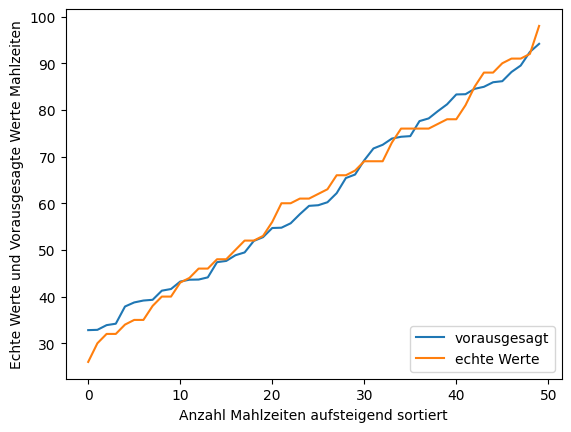

In [5]:
import matplotlib.pyplot as plt
import copy
import numpy as np

def trainieren(x1_werte,x2_werte,x3_werte,y_werte,anzahl_durchgänge,lernrate):
    """Lernsystem trainieren"""
    w1,w2,w3=0,0,0
    
    for lauf in range(anzahl_durchgänge):
        fehler_sum,x1_sum,x2_sum,x3_sum=0,0,0,0
        for i in range(len(x1_werte)):
            
            fehler_sum = (x1_werte[i]* w1 + x2_werte[i] * w2 + x3_werte[i] * w3 - y_werte[i])
                     
            x1_sum+=fehler_sum * x1_werte[i]
            x2_sum+=fehler_sum * x2_werte[i]
            x3_sum+=fehler_sum * x3_werte[i]
        
        
        change_w1=2*-x1_sum/len(x1_werte) *lernrate  
        change_w2=2*-x2_sum/len(x1_werte) *lernrate
        change_w3=2*-x3_sum/len(x1_werte) *lernrate
        
        if abs(change_w3)<.00001 and abs(change_w1)<.00001 and abs(change_w2)<.00001:
            print(f"\nEnde, keine Verbesserung mehr möglich w1 = {w1:5.2f} w2 = {w2:5.2f} b= {w3:5.2f} in Lauf {lauf} \n")
            return w1,w2,w3
        else:
            
            w1 += change_w1
            w2 += change_w2
            w3 += change_w3
        
    return w1,w2,w3

############Ausgewählte Ergebnisse prüfen##################
def voraussagen(w1,w2,b):
    """Für 3 ausgewählte Eingaben die Prognose mit der Realität vergleichen"""
    fehler,Ergebnisse=0,{(28,13):52,(56,80):56,(83,80):78}
    print(f" {b:2.3f} errechneter b-Wert,{w1:4.2f} errechneter w1-Wert , {w2:4.2f} errechneter w2-Wert\n")
    for x,y in Ergebnisse.items():
        print(f" Für {x[0]} Reservierungen und {x[1]} Besucher vorausgesagt mit {w1*x[0] + w2* x[1] + b:6.2f},echter Wert {y} \n")
        #fehler+=(w1*x[0] + w2* x[1] +b -y)**2
        fehler_sum=0
    for _ in range(len(x1)):
        fehler_sum+=(w1*x[0] + w2* x[1] +b -y)**2
        
    print(f" Gesamtfehlerquadrat für alle Werte {fehler_sum}") 

#############DATEN einlesen und vorbereiten, Bias ergänzen###############  
x1,x2,x3,y=[],[],[],[]    
with open("Data/Reservierungen1.txt", "r") as fh:
    for line in fh:
        x1_roh,x2_roh,y_roh=line.rstrip().split(",")        
        x1.append(float(x1_roh))
        x2.append(float(x2_roh))
        x3.append(1.0)#Bias
        y.append(float(y_roh))


###########LERNSYSTEM auswerten###################    
wres1,wres2,wres3=trainieren(x1,x2,x3,y,150000,1.49e-4)#150000 1.2e-4
voraussagen(wres1,wres2,wres3)
x,y1=[],[]
for i in range(len(x1)):
    x.append(i)
    y1.append(x1[i]*wres1+x2[i]*wres2+x3[i]*wres3)
y1.sort()
y.sort()
##########GRAPHIK######################################    
plt.ylabel("Echte Werte und Vorausgesagte Werte Mahlzeiten")
plt.xlabel("Anzahl Mahlzeiten aufsteigend sortiert")
plt.plot(x,y1,label="vorausgesagt")
plt.plot(x,y,label="echte Werte")
#plt.plot((28,),())
plt.legend(loc='lower right')  

#print(wres1,wres2,wres3)

Wir können sehen, dass unser Lern-System die multidimensionale Regression relativ gut abbildet. Es ist sehr abhängig von der Lernrate. Wenn wir diese verändern, kann das Ergebnis deutlich schlechter werden. Hingegen ist eine Verbesserung in unserem Beispiel kaum möglich, wie die Grafik unten zeigt. Ab einer Lernrate von 1.5e-4 arbeitet unser System nicht mehr. Der Fehler wird dann von Schritt zu Schritt größer und geht gegen unendlich. Dieser Übergang geht schlagartig. Für 1.49e-4 erhalten wir noch brauchbare Werte. Wir erleben hier den Effekt des Overshooting.

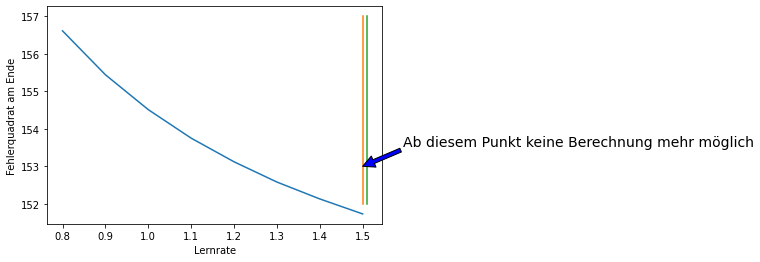

In [2]:
x=[.8,.9,1.0,1.1,1.2,1.3,1.4,1.5]
y=[156.61,155.44,154.51,153.75,153.12,152.58,152.13,151.73]
plt.plot(x,y)
plt.plot((1.5,1.5),(152,157))
plt.plot((1.51,1.51),(152,157))
plt.xlabel("Lernrate")
plt.ylabel("Fehlerquadrat am Ende")
ax = plt.gca()

plt.annotate("Ab diesem Punkt keine Berechnung mehr möglich",
         xy=(1.5, 153), 
         xycoords='data',
         xytext=(+40, +20),
         textcoords='offset points', 
         fontsize=14,
         arrowprops=dict(facecolor='blue'))
None

In unserer dreidimensionalen Darstellung sehen wir hier die prognostizierten Punkte als Kreis, die wahren Labels als Dreieck.<br><br>
<img width=800 height=800 class="imgright" src="Images/3d.png">

Eine Erweiterung des Systems auf weitere Dimensionen ist natürlich jederzeit möglich, eine Darstellung des Eingangsraumes der Daten ist aber dann für uns auf 3 Dimensionen beschränkte Wesen nicht mehr vollständig möglich.